In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/racheldyap/Desktop/DataScienceFoundations/Session_3/2_titanic_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ''

df['title'] = df['Name'].apply(get_title)

In [5]:
df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [6]:
df['title'] = df['title'].replace(['Lady', 'Countess', 'Capt', 'Don', 'Col', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [7]:
df['title'] = df['title'].replace('Mlle', 'Miss')
df['title'] = df['title'].replace('Ms', 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')

In [8]:
df.loc[df['Age'] <= 16, 'NumericAge'] = 0 
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'NumericAge'] = 1 
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'NumericAge'] = 2 
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'NumericAge'] = 3 
df.loc[df['Age'] > 64, 'NumericAge'] = 4 

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,NumericAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,3.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,0.0


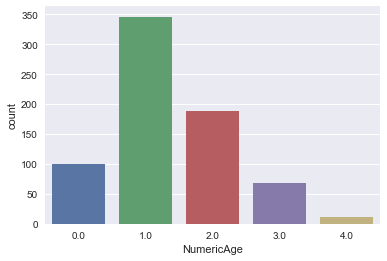

In [11]:
sns.countplot(df['NumericAge'])
plt.show()

In [48]:
df['CatergorAge'] = pd.cut(df['Age'], 5)

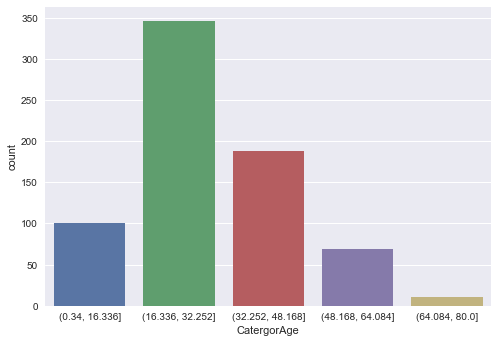

In [49]:
sns.countplot(df['CatergorAge'])
plt.show()

In [50]:
df['CatergorAge'].head()

0    (16.336, 32.252]
1    (32.252, 48.168]
2    (16.336, 32.252]
3    (32.252, 48.168]
4    (32.252, 48.168]
Name: CatergorAge, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [51]:
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

df['person'] = df[['Age', 'Sex']].apply(get_person, axis=1)

In [53]:
df.person.unique()

array(['male', 'female', 'child'], dtype=object)

In [54]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)

title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare':5}
df['title'] = df['title'].map(title_mapping)
df['title'] = df['title'].fillna(0)

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,NumericAge,CatergorAge,person
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.0,"(16.336, 32.252]",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,3,2.0,"(32.252, 48.168]",female
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1.0,"(16.336, 32.252]",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3,2.0,"(32.252, 48.168]",female
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,2.0,"(32.252, 48.168]",male


In [65]:
gr = df[['person', 'Survived']].groupby(['person'], as_index=False).mean()

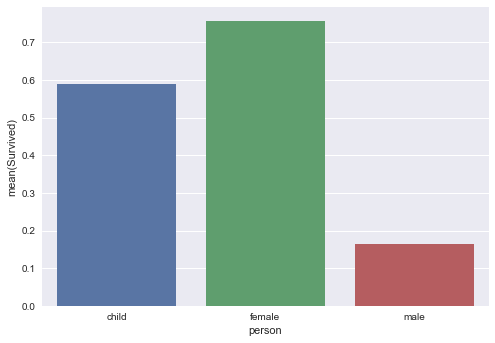

In [66]:
sns.barplot(x='person', y='Survived', data=gr)
plt.show()

In [67]:
gr = df[['person', 'Survived']].groupby(['person']).mean()

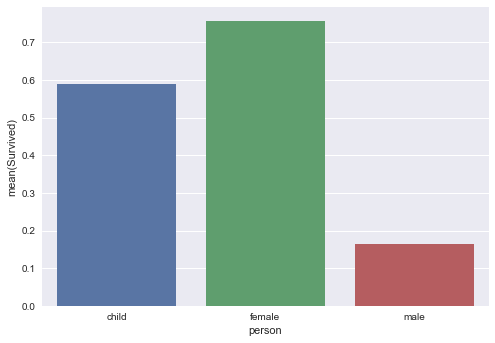

In [70]:
sns.barplot(x=gr.index, y=gr.Survived)
plt.show()

In [80]:
df.groupby(['person', 'Embarked']).agg({'Age':'mean', 'Survived':'sum'})[['Age', 'Survived']].reset_index()

,person,Embarked,Age,Survived
0,child,C,8.245556,14
1,child,Q,7.200000,1
2,child,S,5.737500,34
3,female,C,33.750000,53
4,female,Q,25.136364,26
5,female,S,31.716561,124
6,male,C,34.960938,26
7,male,Q,39.500000,3
8,male,S,32.608309,59


In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,NumericAge,CatergorAge,person
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.0,"(16.336, 32.252]",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,3,2.0,"(32.252, 48.168]",female
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1.0,"(16.336, 32.252]",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3,2.0,"(32.252, 48.168]",female
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,2.0,"(32.252, 48.168]",male


In [84]:
df['family'] = df['Parch'] + df['SibSp']

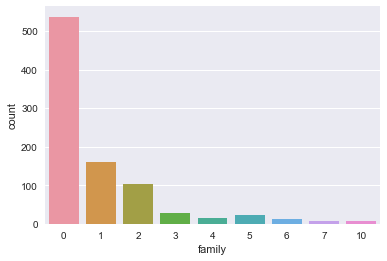

In [87]:
sns.countplot(df['family'])

In [96]:
group = df[['family', 'Survived']].groupby('family').mean()
df[['family', 'Survived']].groupby('family').mean()

,Survived
family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


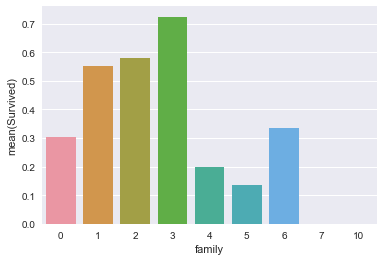

In [95]:
sns.barplot(group.index, group.Survived)

In [97]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [132]:
def cabin(number):
    if type(number) is str:
        return number[0]
    else: return '0'
    
df['cab']= df['Cabin'].apply(cabin)

In [134]:
gr = df[['cab', 'Survived']].groupby('cab').mean()

df[['cab', 'Survived']].groupby('cab').mean()

,Survived
cab,
0,0.299854
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


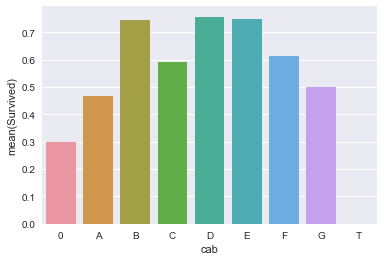

In [135]:
sns.barplot(gr.index, gr.Survived)

In [136]:
df['fare2'] = pd.cut(df['Fare'], 10)

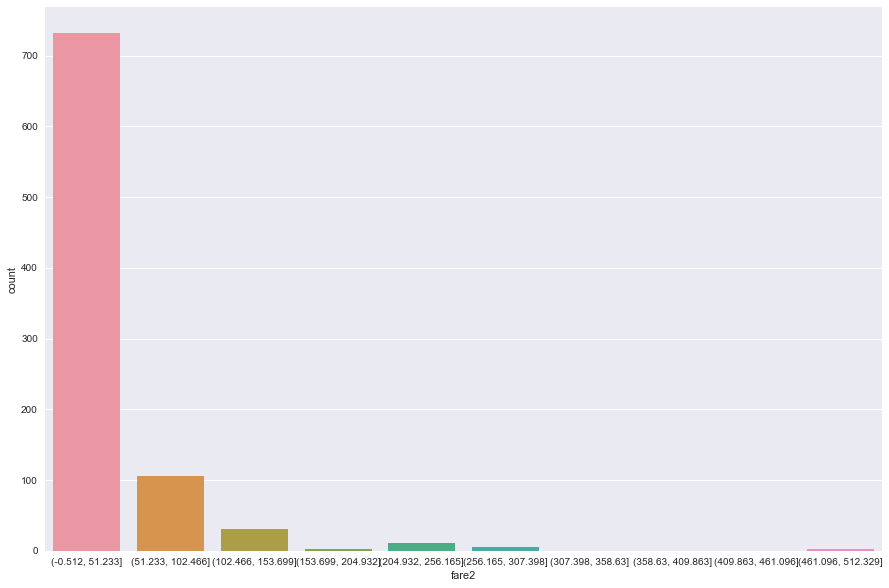

In [139]:
plt.figure(figsize=[15,10])
sns.countplot(df['fare2'])

In [151]:
df['fare3'] = pd.cut(df[df['Fare'] <= 100].Fare, 10)

In [157]:
gr = df[['fare3', 'Survived']].groupby('fare3').mean()
df[['fare3', 'Survived']].groupby('fare3').mean()

,Survived
fare3,
"(-0.0935, 9.35]",0.198113
"(9.35, 18.7]",0.380435
"(18.7, 28.05]",0.474453
"(28.05, 37.4]",0.419355
"(37.4, 46.75]",0.368421
"(46.75, 56.1]",0.485714
"(56.1, 65.45]",0.750000
"(65.45, 74.8]",0.263158
"(74.8, 84.15]",0.741935


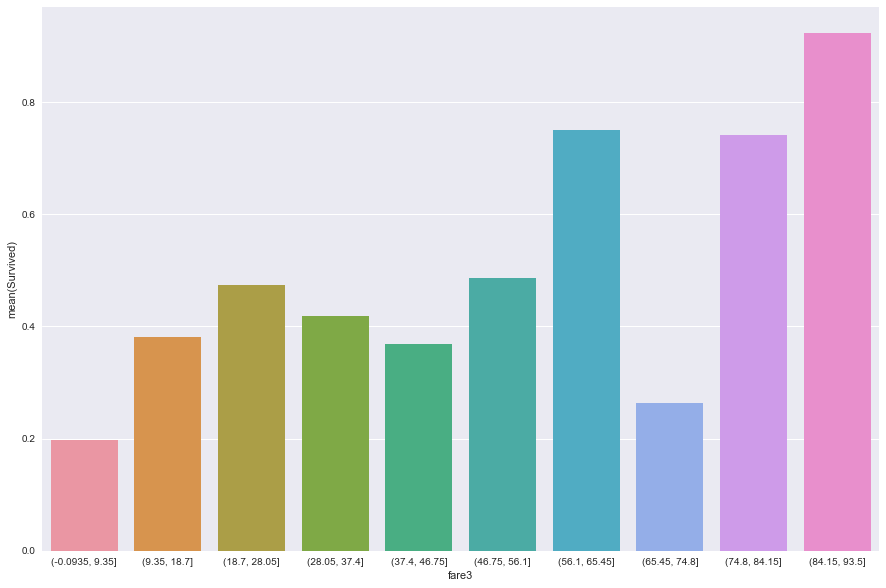

In [159]:
plt.figure(figsize=[15,10])
sns.barplot(gr.index, gr.Survived)